In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

## Importing Data
#### Changing Data Types Of Columns

In [153]:
df = pd.read_excel('Data.xlsx')
df = df.fillna(0)

In [154]:
df.Age = df.Age.astype(float).astype(int)
df.Salary = df.Salary.astype(float).astype(int)

In [155]:
df['Purchased_binary'] = df.Purchased.apply(lambda x : 0 if x == 'No' else 1)

In [156]:
df

,Country,Age,Salary,Purchased,Gender,EstimatedSalary,Purchased_binary
0,France,44,72000,No,M,72000.0,0
1,Spain,27,48000,Yes,M,48000.0,1
2,Germany,30,54000,No,F,54000.0,0
3,Spain,38,61000,No,M,61000.0,0
4,Germany,40,0,Yes,F,0.0,1
5,France,35,58000,Yes,F,58000.0,1
6,Spain,0,52000,No,F,52000.0,0
7,France,48,79000,Yes,M,79000.0,1
8,Germany,50,83000,No,M,83000.0,0
9,France,37,67000,Yes,M,67000.0,1


In [157]:
X= df.iloc[:,[1,2]].values
y=df.iloc[:,6].values

In [158]:
X

array([[   44, 72000],
       [   27, 48000],
       [   30, 54000],
       [   38, 61000],
       [   40,     0],
       [   35, 58000],
       [    0, 52000],
       [   48, 79000],
       [   50, 83000],
       [   37, 67000]])

In [159]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

## Standarding data points by taking out z-scores

In [160]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Loading Light GBM

In [161]:
d_train = lgb.Dataset(x_train, label= y_train)

In [162]:
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

In [163]:
clf= lgb.train(params, d_train, 100)

In [164]:
y_pred = clf.predict(x_test)


for i in range(0,3):
    if (y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0
len(y_pred)  

3

## Taking Out Accuracy

In [165]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.3333333333333333

In [166]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 2],
       [0, 1]], dtype=int64)

In [167]:
y_test = np.array([y_test]) 
y_train = [[i] for i in y_train]
y_train = np.array(y_train) 

In [170]:
print(x_train,',',x_train.shape)
print(y_train,',',y_train.shape)

[[ 0.29127586  0.44897083]
 [-0.38836782 -1.41706417]
 [-2.22340576 -1.0242147 ]
 [ 1.03888391  1.62751925]
 [ 0.35924023 -0.14030338]
 [ 0.76702644  0.94003267]
 [ 0.15534713 -0.43494049]] , (7, 2)
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]] , (7, 1)


In [195]:
xlist = []
for ix, x in enumerate(x_train):
    xlist.insert(ix,x[0])
xlist = [[i] for i in xlist]
xlist = np.array(xlist) 

In [196]:
xlist

array([[ 0.29127586],
       [-0.38836782],
       [-2.22340576],
       [ 1.03888391],
       [ 0.35924023],
       [ 0.76702644],
       [ 0.15534713]])

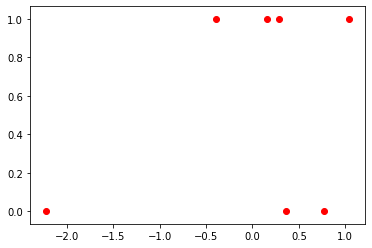

In [200]:
plt.scatter(xlist , y_train, color = 'red')
# plt.plot(xlist , clf.predict(xlist), color ='blue')